# Problem Statement  

- The Diabetes prediction dataset comprises medical and demographic information of patients alongside their diabetes status (positive or negative). It includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

- This dataset can be utilized to develop machine learning models for predicting diabetes based on patients' medical history and demographic data. This is valuable for healthcare professionals in identifying at-risk patients and tailoring treatment plans.

- Moreover, researchers can use the dataset to examine the relationships between various medical and demographic factors and the risk of developing diabetes.

# Study Objective

- Investigate the primary causes of diabetes and develop models.

# Methodology Followed 

- Step 1 : Importing necessary libraries and warnings
- Step 2 : Reading and Cleaning of the Dataset
- Step 3 : Exploratory Data Analysis (EDA)
- Step 4 : Splitting the Dataset for Train and Test data for Model Building
- Step 5 : Multiple Model Building
- Step 6 : Conclusion

# Step 1 : Importing necessary libraries and warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#Importing warning libraries

import warnings

warnings.filterwarnings('ignore')

# Step 2 : Reading and Cleaning of the Dataset

In [5]:
diabetes_df=pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [7]:
diabetes_df.shape

(100000, 9)

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
#Checking for missing value

diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- We can see that the data has no missing value so we can move on with this dataset

In [18]:
#Checking for duplicate values 

diabetes_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [20]:
# Removing the duplicates

diabetes_df.drop_duplicates(inplace=True)

diabetes_df.duplicated().sum()

0

- We have removed the duplicates as well. Let us move on to some basic EDA to understand the dataset

# Step 3 : Exploratory Data Analysis (EDA)

### Univariate Analysis

In [25]:
#Checking the dataset 

diabetes_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


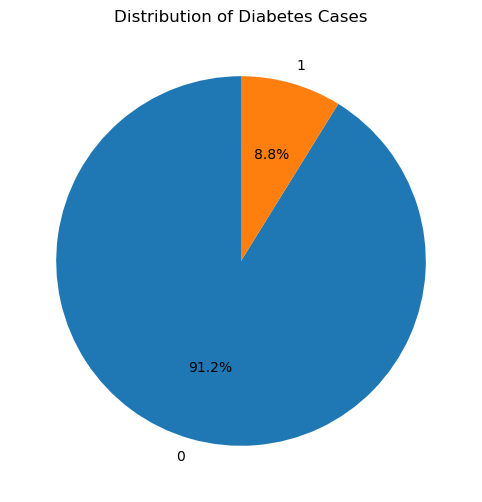

In [39]:
#counting the unique values in diabetes column and visualizing them

counts = diabetes_df['diabetes'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=counts.index)
plt.title('Distribution of Diabetes Cases')
plt.ylabel('')  # Hides the y-label
plt.show()

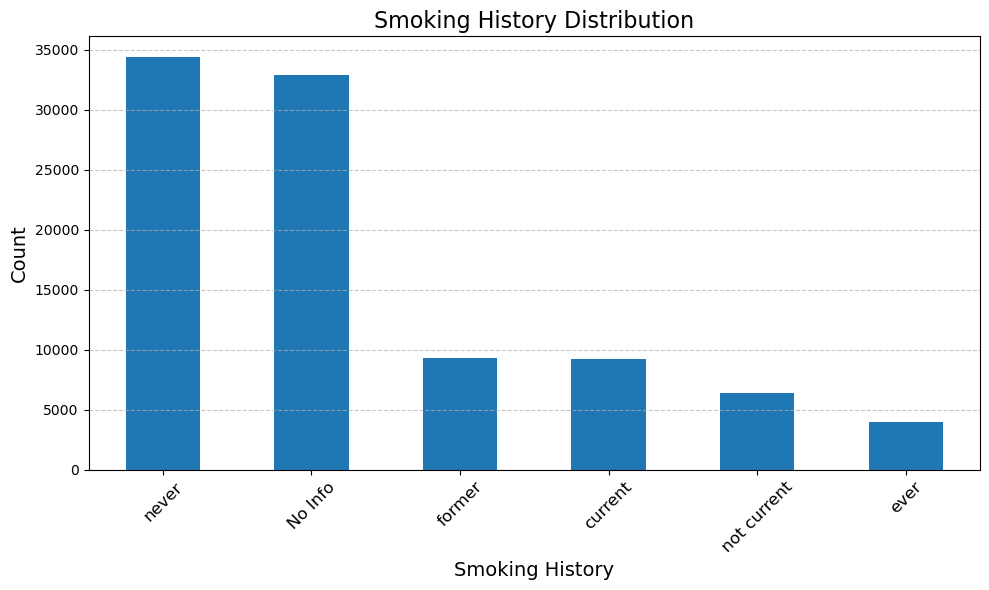

In [45]:
#counting and visulizing the unique values in smoking_history column

# Getting the counts for each smoking history category
smoking_counts = diabetes_df['smoking_history'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))
smoking_counts.plot(kind='bar')
plt.title('Smoking History Distribution', fontsize=16)
plt.xlabel('Smoking History', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

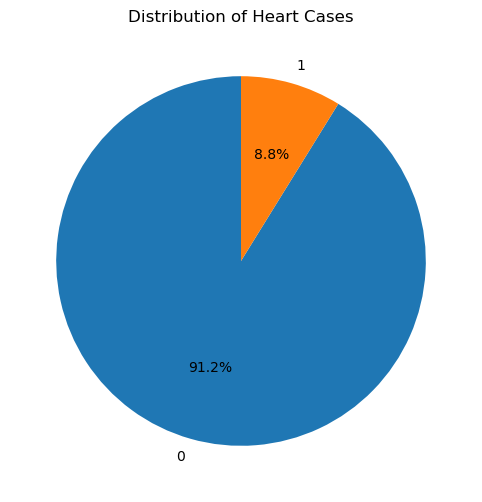

In [53]:
#counting and visualizing the unique values in heart_disease column

heart_counts = diabetes_df['heart_disease'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=heart_counts.index)
plt.title('Distribution of Heart Cases')
plt.ylabel('')  # Hides the y-label
plt.show()

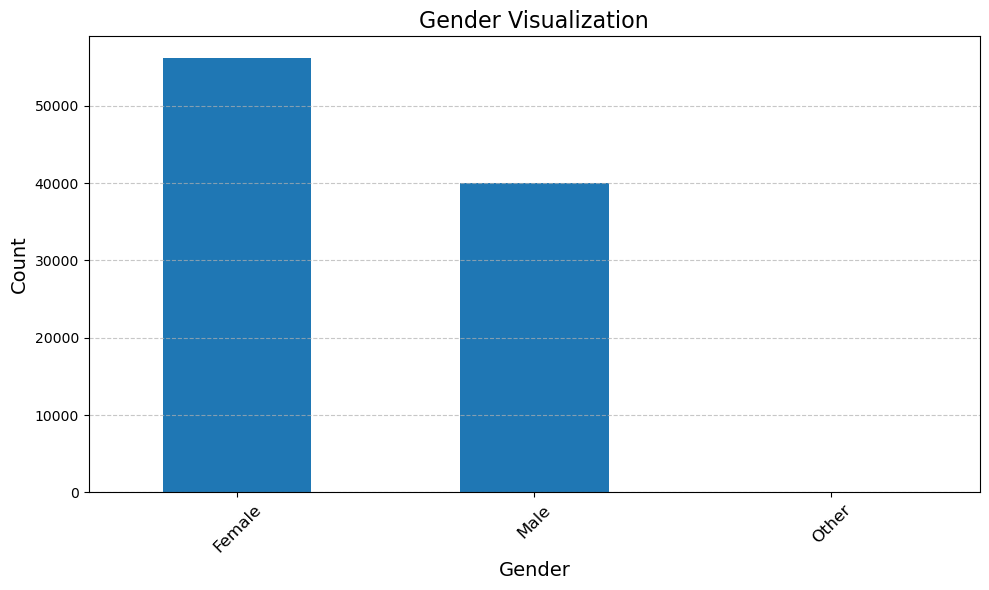

In [51]:
#counting and visualizing the unique values in gender column

gender_counts = diabetes_df['gender'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')
plt.title('Gender Visualization', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Bi-variate Analysis

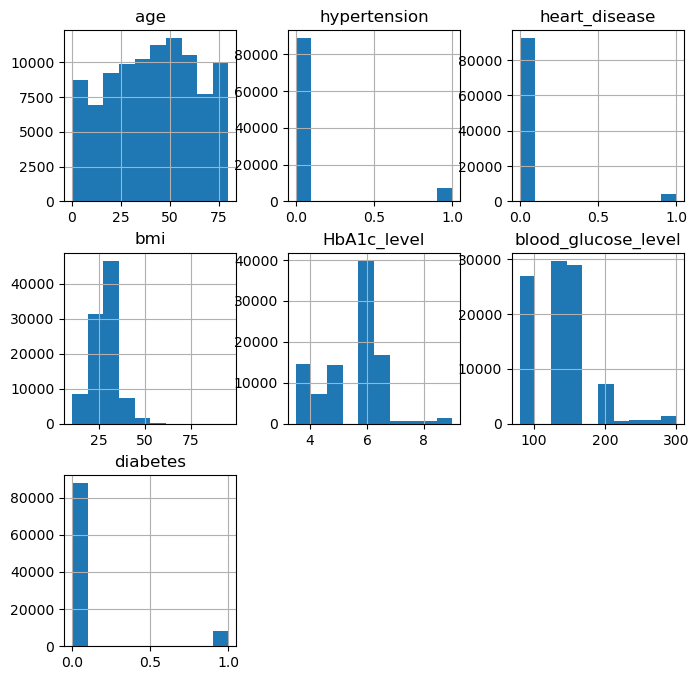

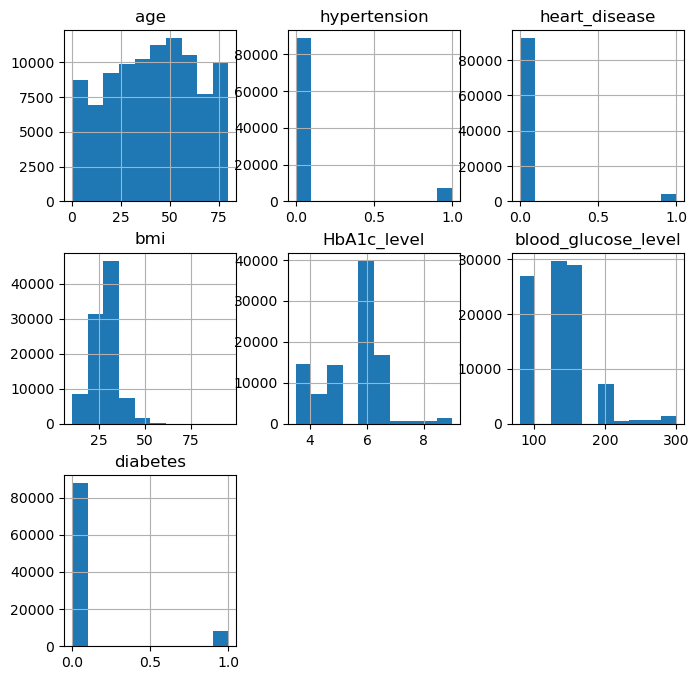

In [59]:
diabetes_df.hist(figsize=(8,8))
plt.show()

INSIGHT - 

- Age Distribution:The age distribution is relatively even but peaks around 50-60 years. This indicates a significant portion of the dataset consists of middle-aged individuals.

  
- Chronic Conditions (Hypertension & Heart Disease):Both hypertension and heart disease histograms are heavily skewed towards 0, suggesting that the majority of the individuals in the dataset do not have these conditions.


- Blood Glucose and BMI Levels:Blood glucose levels are concentrated between 100-200, with a smaller fraction showing significantly higher levels.
The BMI values show a typical distribution for a general population, clustering between 20-30, indicating many individuals fall within the normal-to-overweight range.


- Age Group and BMI:Most individuals are in the middle-aged range (30-60 years), reflecting a higher focus on this age group in the dataset. BMI values cluster primarily between 20-30, indicating a majority fall within the normal or overweight category.


- Health Conditions (HbA1c and Blood Glucose Levels):HbA1c levels are concentrated between 4-6, suggesting a dominant presence of individuals with normal blood sugar control. Blood glucose levels also mostly range from 100-200, hinting that a majority have blood sugar levels within or slightly above normal ranges.

In [62]:
# Finding mean age of people having diabetes

print(diabetes_df['age'].mean())

41.79432571297817


- So the mean range of people having Diabetes is 41

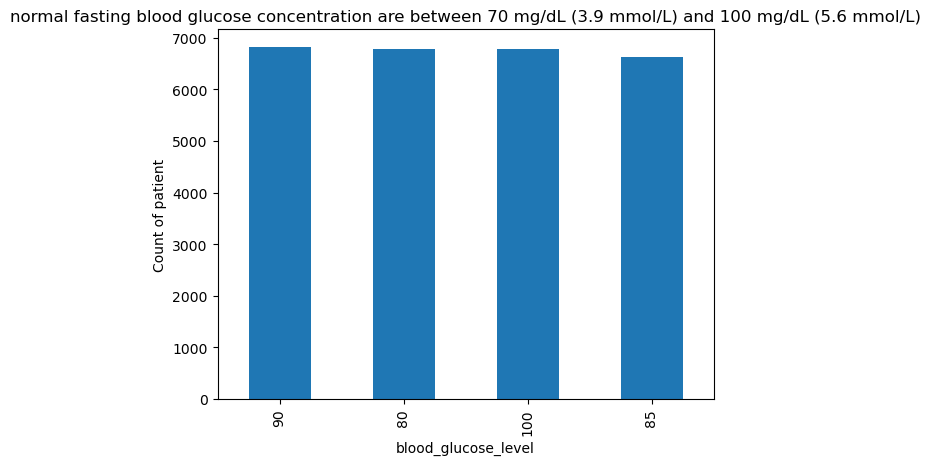

In [67]:
blood_glucose_level_above_70_and_less_than_100 = diabetes_df[(diabetes_df['blood_glucose_level'] <= 100) & (diabetes_df['blood_glucose_level'] >= 70)]

blood_glucose_level_above_70_and_less_than_100['blood_glucose_level'].value_counts().plot(kind='bar')

plt.title('normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L)')

plt.xlabel('blood_glucose_level')

plt.ylabel('Count of patient')

plt.show()

- Normal fasting blood glucose levels range from 70 mg/dL (3.9 mmol/L) to 100 mg/dL (5.6 mmol/L). If fasting blood glucose is between 100 and 125 mg/dL (5.6 to 6.9 mmol/L), lifestyle changes and glycemia monitoring are advised.

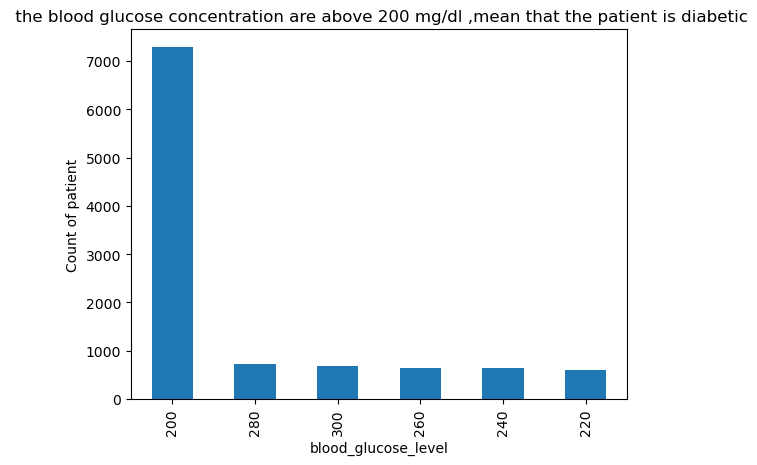

In [70]:
blood_glucose_level_above_200=diabetes_df[diabetes_df['blood_glucose_level']>=200]

blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar')

plt.title(' the blood glucose concentration are above 200 mg/dl ,mean that the patient is diabetic')

plt.xlabel('blood_glucose_level')

plt.ylabel('Count of patient')

plt.show()

- A normal A1C level is under 5.7%; 5.7% to 6.4% indicates prediabetes, while 6.5% or higher indicates diabetes.

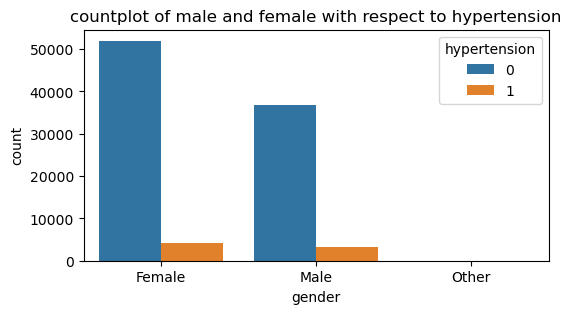

In [73]:
 plt.figure(figsize=(6, 3))

sns.countplot(x=diabetes_df['gender'], hue=diabetes_df['hypertension'], data=diabetes_df)

plt.title('countplot of male and female with respect to hypertension')

plt.show()

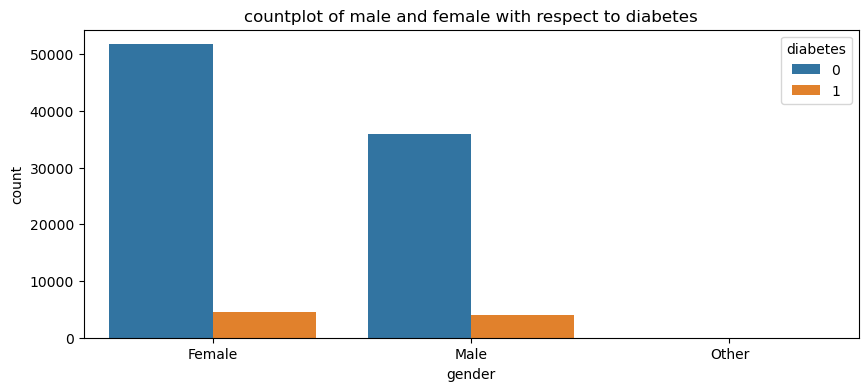

In [75]:
plt.figure(figsize=(10, 4))

sns.countplot(x=diabetes_df['gender'], hue=diabetes_df['diabetes'], data=diabetes_df)

plt.title('countplot of male and female with respect to diabetes')

plt.show()

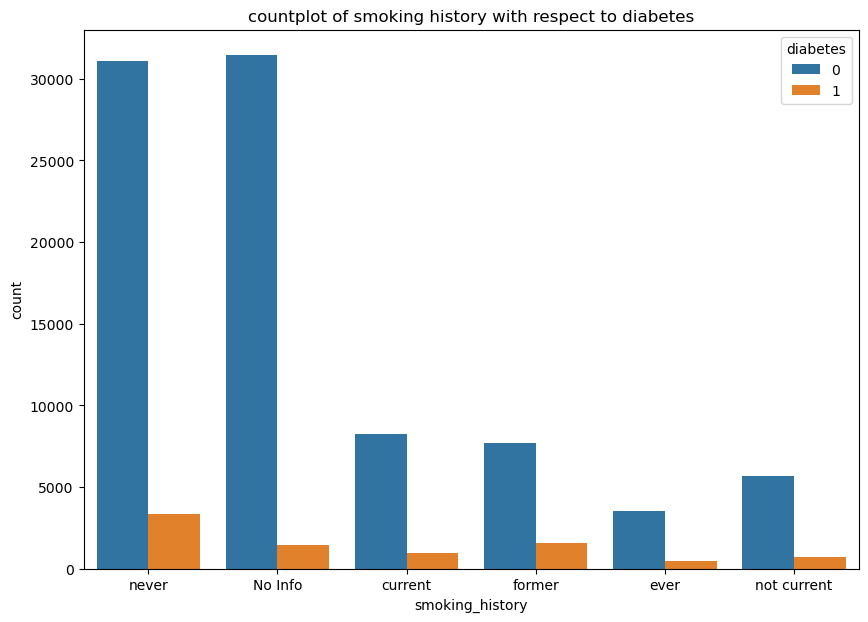

In [77]:
plt.figure(figsize=(10, 7))

sns.countplot(x=diabetes_df['smoking_history'], hue=diabetes_df['diabetes'], data=diabetes_df)

plt.title('countplot of smoking history with respect to diabetes')

plt.show()

# Step 4 : Splitting the Dataset for Train and Test data for Model Building

### Data Pre-Processing for Splitting 

In [85]:
#converting categorical data into numerical data

encoder=LabelEncoder()

diabetes_df['gender']=encoder.fit_transform(diabetes_df['gender'])

diabetes_df['smoking_history']=encoder.fit_transform(diabetes_df['smoking_history'])

In [91]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [93]:
### Splitting the Dataset

X = diabetes_df.drop('diabetes', axis=1)

y = diabetes_df['diabetes']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [97]:
X_train.shape,X_test.shape,X.shape

((76916, 8), (19230, 8), (96146, 8))

In [99]:
X.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [101]:
y.head(2)

0    0
1    0
Name: diabetes, dtype: int64

# Step 5 : Multiple Model Building

### Logistic Regression

In [105]:
lr=LogisticRegression(max_iter=3000)

lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [107]:
y_predection=lr.predict(X_test)

In [109]:
lr_accuracy = accuracy_score(y_test, y_predection)

lr_conf_matrix = confusion_matrix(y_test, y_predection)

lr_classification_rep = classification_report(y_test, y_predection)

In [111]:
print(f'lr_Accuracy: {lr_accuracy:.2f}')

print('\nlr_Confusion Matrix:')

print(lr_conf_matrix)

print('\nlr_Classification Report:')

print(lr_classification_rep)

lr_Accuracy: 0.96

lr_Confusion Matrix:
[[17326   183]
 [  644  1077]]

lr_Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



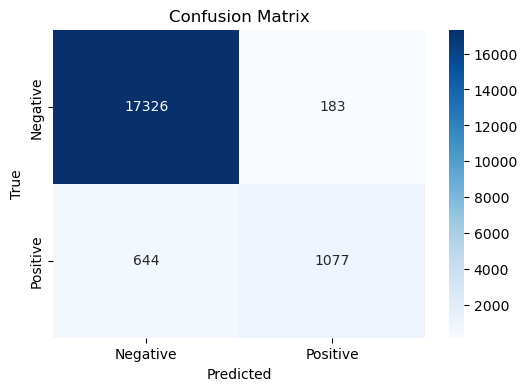

In [113]:
# Plotting the above

plt.figure(figsize=(6, 4))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [154]:
# Checking for Over/Under Fitting 

print("Training Score:",lr.score(X_train,y_train)*100,'%')

print("Testing Score:",lr.score(X_test,y_test)*100,'%')

Training Score: 95.92932549794581 %
Testing Score: 95.69942797711909 %


### Decision Tree

In [116]:
# Define the parameter grid to search

param_grid = {

    'max_depth': [3, 5, 10, None],  # depths to consider

    'min_samples_leaf': [1, 2, 4, 6] } # minimum number of samples required at a leaf node

In [118]:
decision_tree_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [120]:
decision_tree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 6]})

In [122]:
y_pred_dt=decision_tree_model.predict(X_test)

In [124]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

dt_classification_rep = classification_report(y_test, y_pred_dt)

In [130]:
print(f'dt_Accuracy: {dt_accuracy:.2f}')

print('\ndt_Confusion Matrix:')

print(dt_conf_matrix)

dt_Accuracy: 0.97

dt_Confusion Matrix:
[[17509     0]
 [  566  1155]]


In [138]:
# Checking for Over/Under Fitting 

print("Training Score:",decision_tree_model.score(X_train,y_train)*100,'%')

print("Testing Score:",decision_tree_model.score(X_test,y_test)*100,'%')

Training Score: 97.08123147329555 %
Testing Score: 97.0566822672907 %


### Random Forest 

In [141]:
# Initialize and run GridSearchCV with RandomForestClassifier and parameter grid
param_grid = {
    'n_estimators': [10, 50, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=2, n_jobs=-1)

In [143]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred_rf=random_forest_model.predict(X_test)

In [147]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_classification_rep = classification_report(y_test, y_pred_rf)

In [149]:
print(f'rf_Accuracy: {rf_accuracy:.3f}')

print('\nrf_Confusion Matrix:')

print(rf_conf_matrix)

print('\nrf_Classification Report:')

print(rf_classification_rep)

rf_Accuracy: 0.969

rf_Confusion Matrix:
[[17440    69]
 [  536  1185]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [151]:
# Checking for Over/Under Fitting of the parameters 

print("Training Score:",random_forest_model.score(X_train,y_train)*100,'%')

print("Testing Score:",random_forest_model.score(X_test,y_test)*100,'%')

Training Score: 99.93239378022778 %
Testing Score: 96.8538741549662 %


### Step 6 : Conclusion

- Let us compare the Test, Train and Accuracy Score for each of the model 

--- Logistic Regression

    - Training Score - 95.92
    - Testing Score - 95.69
    - Accuracy Score - 0.96


--- Decision Tree

    - Training Score - 97.08
    - Testing Score - 97.05
    - Accuracy Score - 0.97


--- Random Forest

    - Training Score - 99.93
    - Testing Score - 96.85
    - Accuracy Score - 0.96

### Visual Representation of the scores

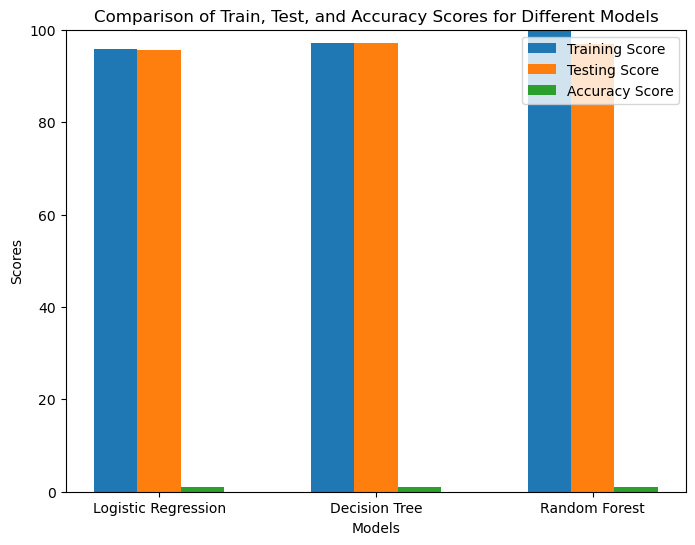

In [163]:
# Data for the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
train_scores = [95.92, 97.08, 99.93]
test_scores = [95.69, 97.05, 96.85]
accuracy_scores = [0.96, 0.97, 0.96]

# Create an index for each model
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(8, 6))
width = 0.2  # The width of the bars

# Plotting each score as a bar
plt.bar(x - width, train_scores, width, label='Training Score')
plt.bar(x, test_scores, width, label='Testing Score')
plt.bar(x + width, accuracy_scores, width, label='Accuracy Score')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Train, Test, and Accuracy Scores for Different Models')
plt.xticks(x, models)
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.legend()

# Show the plot
plt.show()

INSIGHTS - 

- Logistic Regression shows slightly lower training and testing scores compared to the other models. It is fairly good but doesn't perform as well as the Decision Tree and Random Forest in terms of training and testing accuracy.

- The Decision Tree has a very high training and testing score, with almost perfect accuracy. It generalizes well to new data, and the performance on both training and testing sets is excellent.

- Random Forest has an exceptionally high training score but a slightly lower testing score compared to Decision Tree. This suggests it might be overfitting the training data. The accuracy score is still quite good, but the generalization to the test set is a bit lower.

### Model Selection

- The Decision Tree is the best option, boasting the highest testing score of 97.05%. This indicates strong generalization to unseen data while maintaining high accuracy, effectively balancing training and testing performance.

- The Random Forest has the highest training score, but its decreased testing performance suggests potential overfitting, which could be problematic in real-world scenarios with less consistent data.

- Logistic Regression is solid but does not surpass the performance of the other two models.

### Conclusion - The Decision Tree offers the best balance between training and testing performance.